### Naive Bayes algo: this algo works on conditional probability. for example, if it does not rain i will go for shoping otherwise will stay at home.
### It is called naive because it assumes that the occurrence of a certain feature is independent of the occurrence of other features.
### it is called bayes because it dependes on the principle of bayes theorem.
### types of naive nbayes algorithm are as follows
## Guassian naive bayes:
#### Assumes that continuous features follow a normal distribution.
## Bernoulli naive bayes:
#### Assumes that the features are binary variables such as document classification problems where each term is either present or absent.
## Multinomial naive bayes:
#### Assumes that the features follow a muultinomial distribution and is typically used for discrete data such as text data where each feature represnts the frequency of a term 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# gaussian model
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [35]:
# load the dataset
d_set=pd.read_csv("placement.csv")
d_set.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
d_set.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


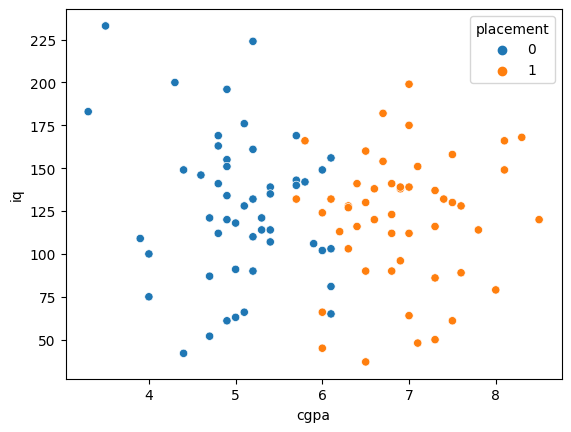

In [36]:
# graphical visualisation
sns.scatterplot(x=d_set['cgpa'], y=d_set['iq'], data=d_set, hue=d_set['placement'])
plt.show()

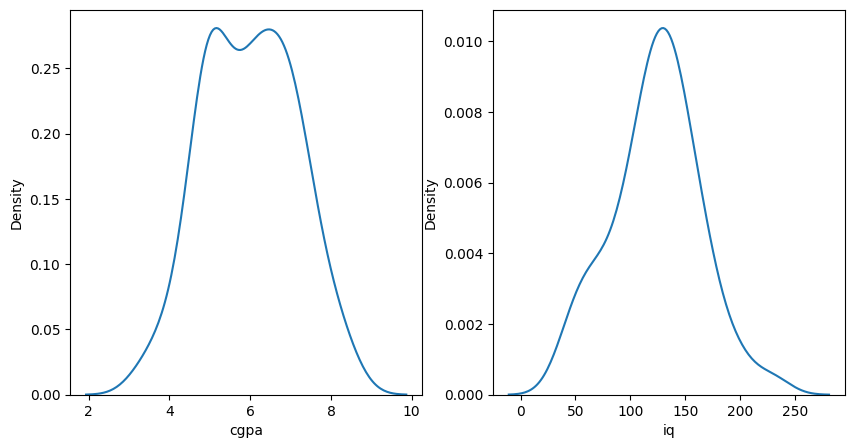

In [37]:
# decide whioch type to use based on distribution and features
# for distribution we have to visualise graphically as follows
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.kdeplot(data=d_set['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(data=d_set['iq'])

plt.show()

### result: from above figures it is clear that the iq column is normally distributed whereas the cgpa column is not that much normally distributed.

## Through Gaussain naive bayes

In [38]:
# separate the input and output data
x=d_set.iloc[:,:-1]
y=d_set['placement']

# split the data
xtrain, xtest, ytrain , ytest=train_test_split(x, y, test_size=0.2)

In [39]:
# now model
gnb=GaussianNB()

# fit the data
gnb.fit(xtrain, ytrain)

GaussianNB()

In [40]:
# score
gnb.score(xtest, ytest)*100

100.0

In [41]:
d_set

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [42]:
# sample prediction(actual --> at 6.7	182.0   1)
gnb.predict([[6.7, 182.0]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### resut: the model has predicted the right answer. hence the model is performing well

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<AxesSubplot: >

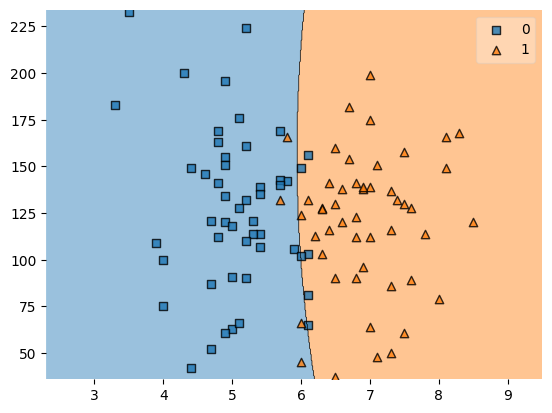

In [50]:
# to check graphically
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gnb)

### result: graphically it is also clear that the line separation is almost accurate here

## Through multinomial

In [43]:
# model
mnb=MultinomialNB()

# fit the data
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [44]:
# score
mnb.score(xtest, ytest)*100

90.0

In [45]:
# sample prediction(actual --> at 4.3	200.0	0)
mnb.predict([[4.3,200.0]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### result: in this case the model has also predicted the right answer

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<AxesSubplot: >

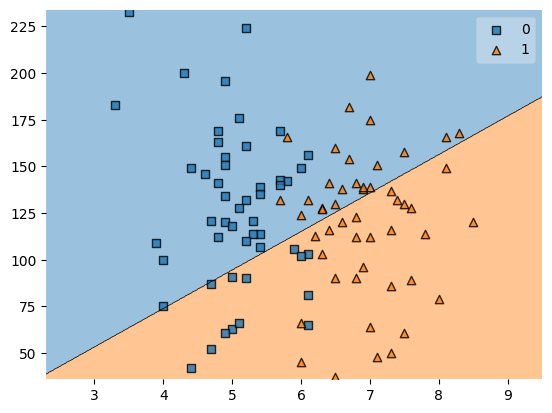

In [51]:
# to check graphically
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=mnb)

### result: it is clear from the above graph that the model is not performing well 

## Through Bernoulli

In [46]:
# model
bnb=BernoulliNB()

# fit the data
bnb.fit(xtrain, ytrain)

BernoulliNB()

In [47]:
# score
bnb.score(xtest, ytest)*100

40.0

In [49]:
# sample prediction(actual --> at 6.3	103.0	1)
bnb.predict([[6.3	,103.0	]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### result: here, this model has predicted the wrong answer, therefore, it is not suitable for this data

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

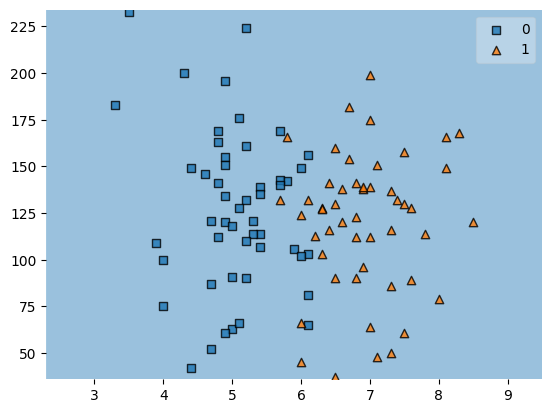

In [52]:
# to check graphically
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=bnb)

### result: graphically the model is not performing well

## Hence from above results the Guassian naive bayes performs well and will be selected for the traing the model 